In [32]:
from diffusers.utils import load_image, make_image_grid
from PIL import Image
import cv2
import numpy as np
import os
import time

In [7]:
text_prompt = "luxury bedroom interior"

In [8]:
crop_img = Image.open("Metadata/Images/2.png")

In [27]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11f1p_sd15_depth", torch_dtype=torch.float16, use_safetensors=True)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, use_safetensors=True
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()


Loading pipeline components...: 100%|███████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]


In [28]:
seed = 12345
generator = torch.Generator().manual_seed(seed)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 18.26it/s]


3.3575146198272705 seconds


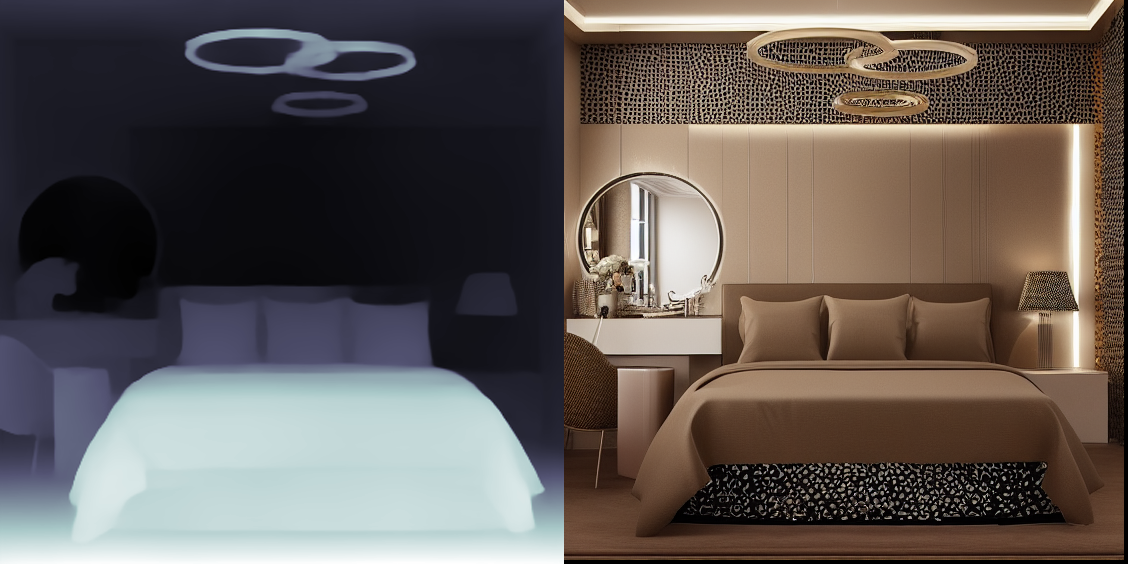

In [34]:
start_time = time.time()
depth_image = crop_img
output = pipe(
    text_prompt, image=depth_image, generator = generator
).images[0]
print(time.time() - start_time ,"seconds")
make_image_grid([depth_image, output], rows=1, cols=2)

## Reducing the number of inference steps can reduce generation latency

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [00:01<00:00, 16.46it/s]


2.1020267009735107 seconds


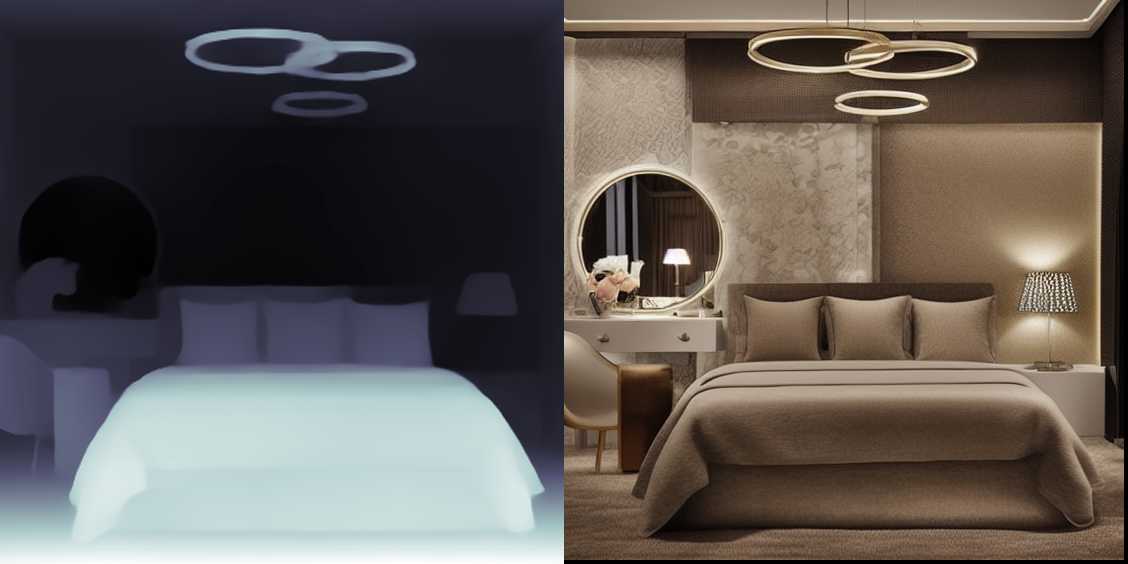

In [35]:
start_time = time.time()
depth_image = crop_img
output = pipe(
    text_prompt, image=depth_image, generator = generator , num_inference_steps = 25
).images[0]
print(time.time() - start_time ,"seconds")
make_image_grid([depth_image, output], rows=1, cols=2)

## Reducing the resolution of the generated image can also decrease generation latency.

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 23.36it/s]


2.714533805847168 seconds


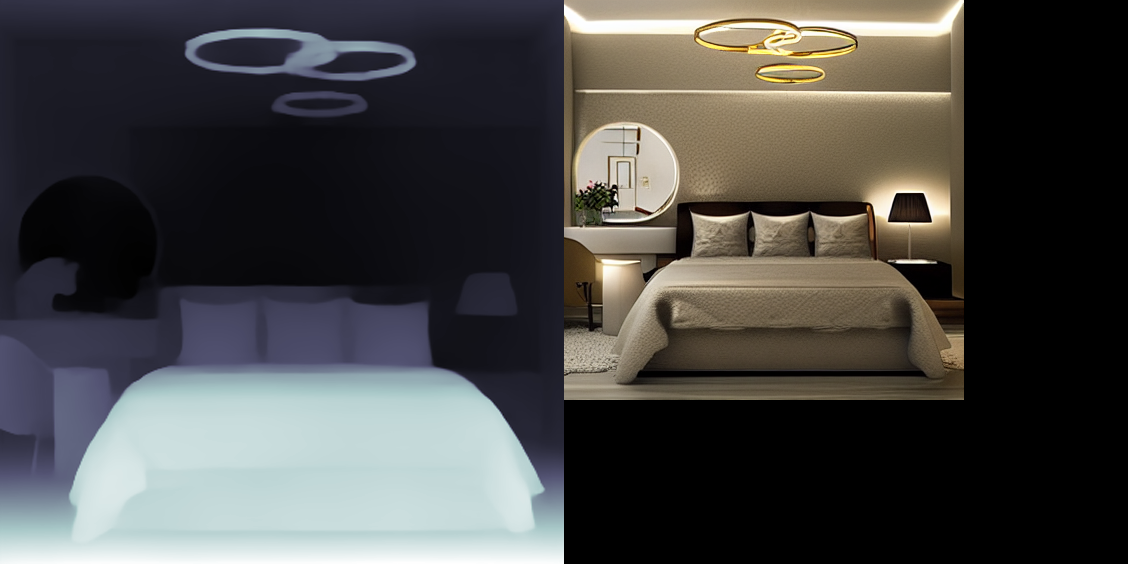

In [36]:
start_time = time.time()
depth_image = crop_img
output = pipe(
    text_prompt, image=depth_image, generator = generator, height = 400 , width= 400
).images[0]
print(time.time() - start_time ,"seconds")
make_image_grid([depth_image, output], rows=1, cols=2)